# FCC-DAWP
## Assignment 4: Page View Time Series Visualizer

# Sample code: 
https://github.com/ine-rmotr-curriculum/data-cleaning-rmotr-freecodecamp

#### Unaltered starter code

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = None

# Clean data
df = None


def draw_line_plot():
    # Draw line plot





    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = None

    # Draw bar plot





    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)





    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

### Submission 
(Paste successful code here; save as `time_series_visualizer.py` for submission)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("https://raw.githubusercontent.com/freeCodeCamp/boilerplate-page-view-time-series-visualizer/main/fcc-forum-pageviews.csv")

# Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

df['date'] = pd.to_datetime(df['date'])

# Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". 
# (https://github.com/freeCodeCamp/boilerplate-page-view-time-series-visualizer/blob/main/examples/Figure_1.png)
# The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. 
# The label on the x axis should be Date and the label on the y axis should be Page Views.
def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(10, 6))  # Adjust size as needed
    
    # Plot the line graph
    ax.plot(df['date'], df['value'], marker='', linestyle='-', color='b')
    
    # Set the title and labels
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    # Show the plot
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()  
    ax.set_xticks(df['date'][::100])
    
    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

# Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png".  
# (https://github.com/freeCodeCamp/boilerplate-page-view-time-series-visualizer/blob/main/examples/Figure_2.png)
# It should show average daily page views for each month grouped by year. 
# The legend should show month labels and have a title of Months. 
# On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = None

    # Draw bar plot
    
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month

    df_grouped = df.groupby(['year', 'month']).agg({'value': 'mean'}).reset_index()

    df_pivot = df_grouped.pivot(index='year', columns='month', values='value')

    fig, ax = plt.subplots(figsize=(12, 6))

    df_pivot.plot(kind='bar', ax=ax)

    ax.set_xlabel('Years')
    ax.set_ylabel('Average Page Views')

    ax.set_xticks(range(len(df_pivot.index)))
    ax.set_xticklabels(df_pivot.index, rotation=0)

    ax.legend(title='Month', labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

# Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png".
# (https://github.com/freeCodeCamp/boilerplate-page-view-time-series-visualizer/blob/main/examples/Figure_3.png)
# These box plots should show how the values are distributed within a given year or month and how it compares over time. 
# The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). 
# Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. 
# The boilerplate includes commands to prepare the data.
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    df_box['month'] = pd.Categorical(df_box['month'], categories=months_order, ordered=True)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    year_palette = sns.color_palette("husl", len(df_box['year'].unique()))
    month_palette = sns.color_palette("husl", len(months_order))

    # Draw box plots (using Seaborn)

    sns.boxplot(x='year', y='value', data=df_box, ax=axes[0], palette=year_palette)
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    sns.boxplot(x='month', y='value', data=df_box, ax=axes[1], palette=month_palette)
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

    plt.tight_layout()
    
    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

### Test/Working Area

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("https://raw.githubusercontent.com/freeCodeCamp/boilerplate-page-view-time-series-visualizer/main/fcc-forum-pageviews.csv")

In [2]:
df

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


In [3]:
# Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

In [4]:
df

,date,value
10,2016-05-19,19736
17,2016-05-26,18060
18,2016-05-27,19997
19,2016-05-28,19044
20,2016-05-29,20325
...,...,...
1294,2019-11-24,138875
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1238 entries, 10 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1238 non-null   object
 1   value   1238 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 29.0+ KB


In [40]:
df['date'] = pd.to_datetime(df['date'])

C:\Users\reillys0212\AppData\Local\Temp\1\ipykernel_46416\3532345252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


In [41]:
# Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". 
# (https://github.com/freeCodeCamp/boilerplate-page-view-time-series-visualizer/blob/main/examples/Figure_1.png)
# The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. 
# The label on the x axis should be Date and the label on the y axis should be Page Views.
import matplotlib.dates as mdates

def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(10, 6))  # Adjust size as needed
    
    # Plot the line graph
    ax.plot(df['date'], df['value'], marker='', linestyle='-', color='b')
    
    # Set the title and labels
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    # Show the plot
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()  
    ax.set_xticks(df['date'][::100])
    
    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig 

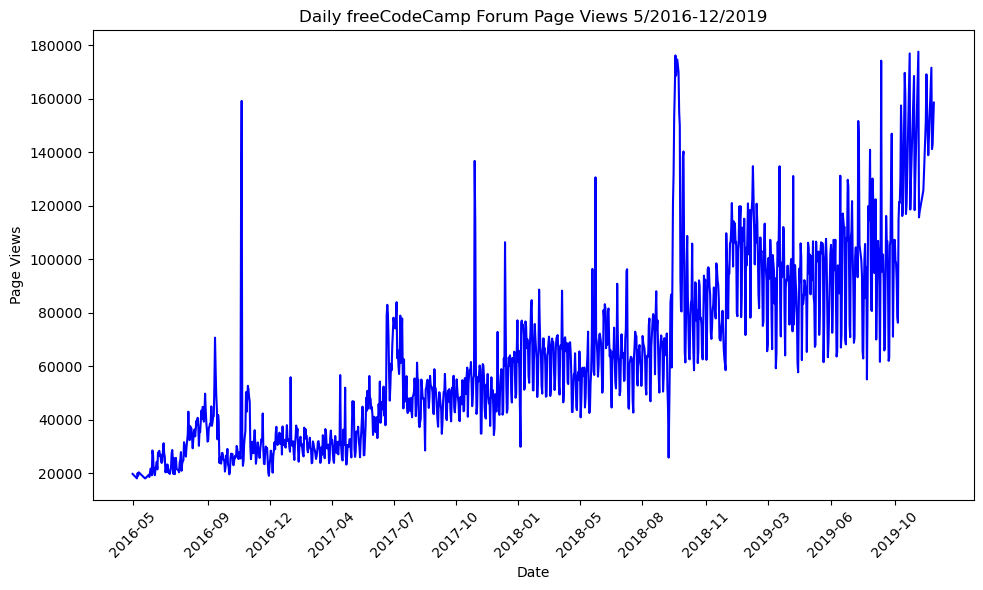

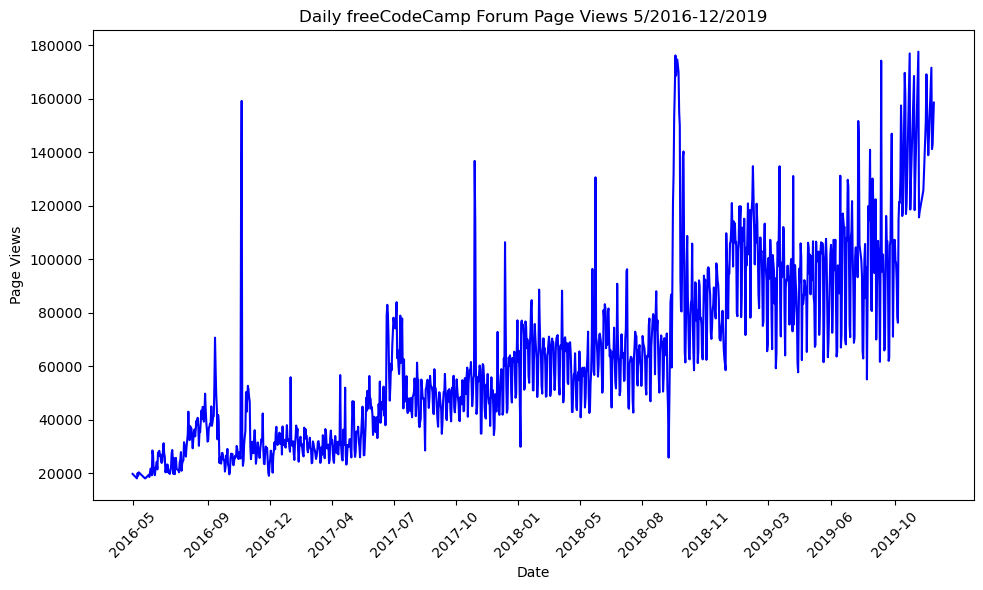

In [42]:
draw_line_plot()

In [45]:
# Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png".  
# (https://github.com/freeCodeCamp/boilerplate-page-view-time-series-visualizer/blob/main/examples/Figure_2.png)
# It should show average daily page views for each month grouped by year. 
# The legend should show month labels and have a title of Months. 
# On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month

    df_grouped = df.groupby(['year', 'month']).agg({'value': 'mean'}).reset_index()

    df_pivot = df_grouped.pivot(index='year', columns='month', values='value')

    fig, ax = plt.subplots(figsize=(12, 6))

    df_pivot.plot(kind='bar', ax=ax)

    ax.set_xlabel('Years')
    ax.set_ylabel('Average Page Views')

    ax.set_xticks(range(len(df_pivot.index)))
    ax.set_xticklabels(df_pivot.index, rotation=0)

    ax.legend(title='Month', labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


    # Draw bar plot

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

C:\Users\reillys0212\AppData\Local\Temp\1\ipykernel_46416\841664941.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date'].dt.year
C:\Users\reillys0212\AppData\Local\Temp\1\ipykernel_46416\841664941.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date'].dt.month


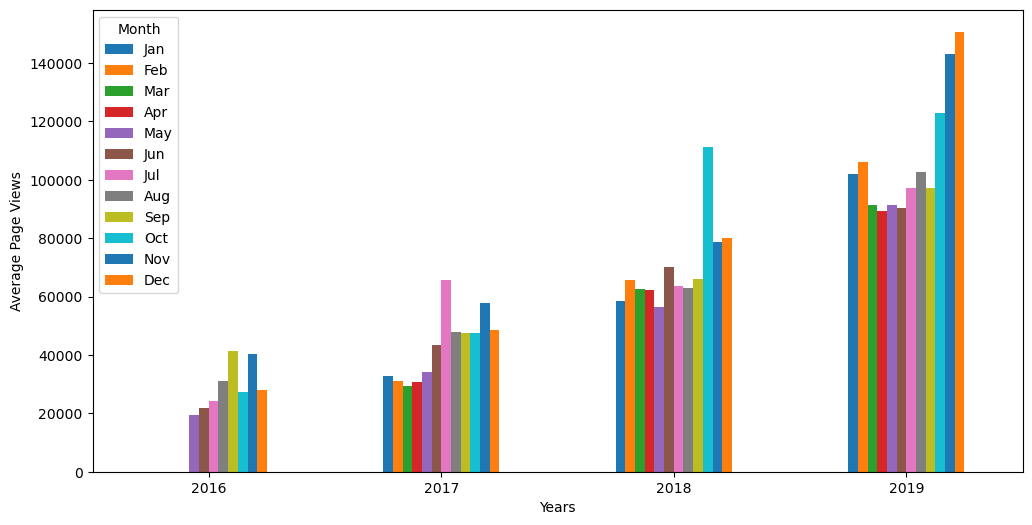

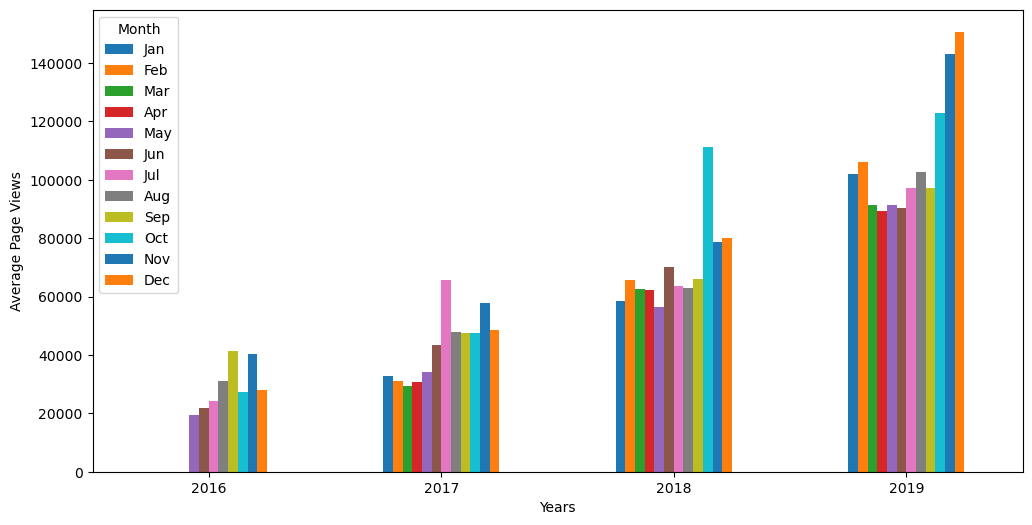

In [46]:
draw_bar_plot()

In [53]:
# Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png".
# (https://github.com/freeCodeCamp/boilerplate-page-view-time-series-visualizer/blob/main/examples/Figure_3.png)
# These box plots should show how the values are distributed within a given year or month and how it compares over time. 
# The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). 
# Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. 
# The boilerplate includes commands to prepare the data.
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    df_box['month'] = pd.Categorical(df_box['month'], categories=months_order, ordered=True)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    year_palette = sns.color_palette("husl", len(df_box['year'].unique()))
    month_palette = sns.color_palette("husl", len(months_order))

    # Draw box plots (using Seaborn)

    sns.boxplot(x='year', y='value', data=df_box, ax=axes[0], palette=year_palette)
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    sns.boxplot(x='month', y='value', data=df_box, ax=axes[1], palette=month_palette)
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

    plt.tight_layout()

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

C:\Users\reillys0212\AppData\Local\Temp\1\ipykernel_46416\2652003993.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='year', y='value', data=df_box, ax=axes[0], palette=year_palette)
C:\Users\reillys0212\AppData\Local\Temp\1\ipykernel_46416\2652003993.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='value', data=df_box, ax=axes[1], palette=month_palette)


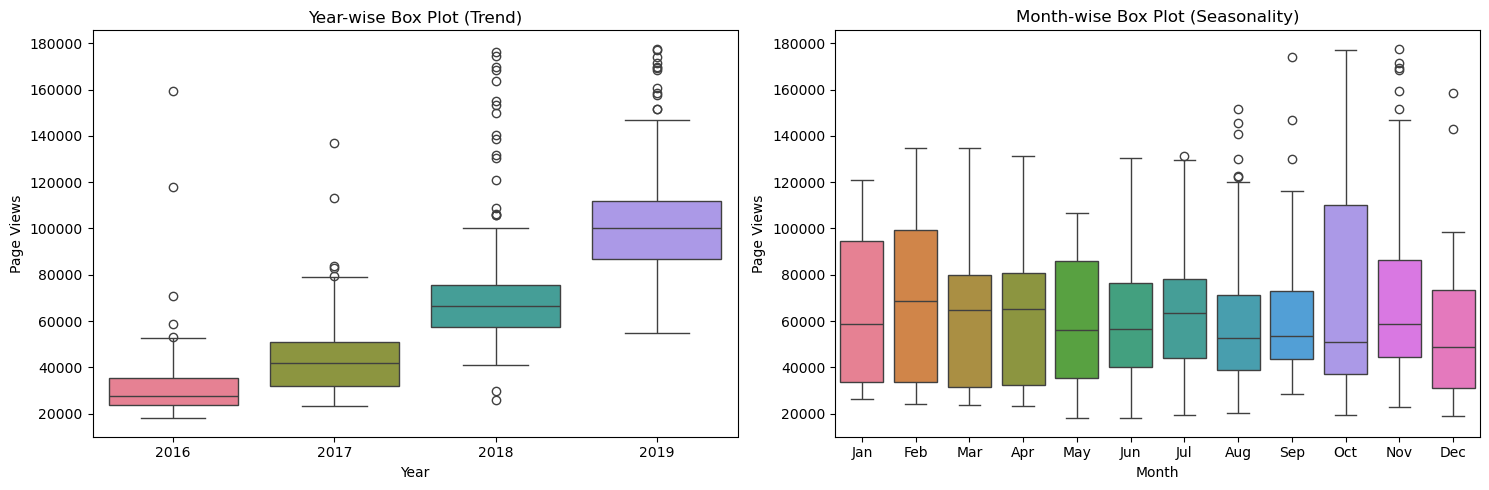

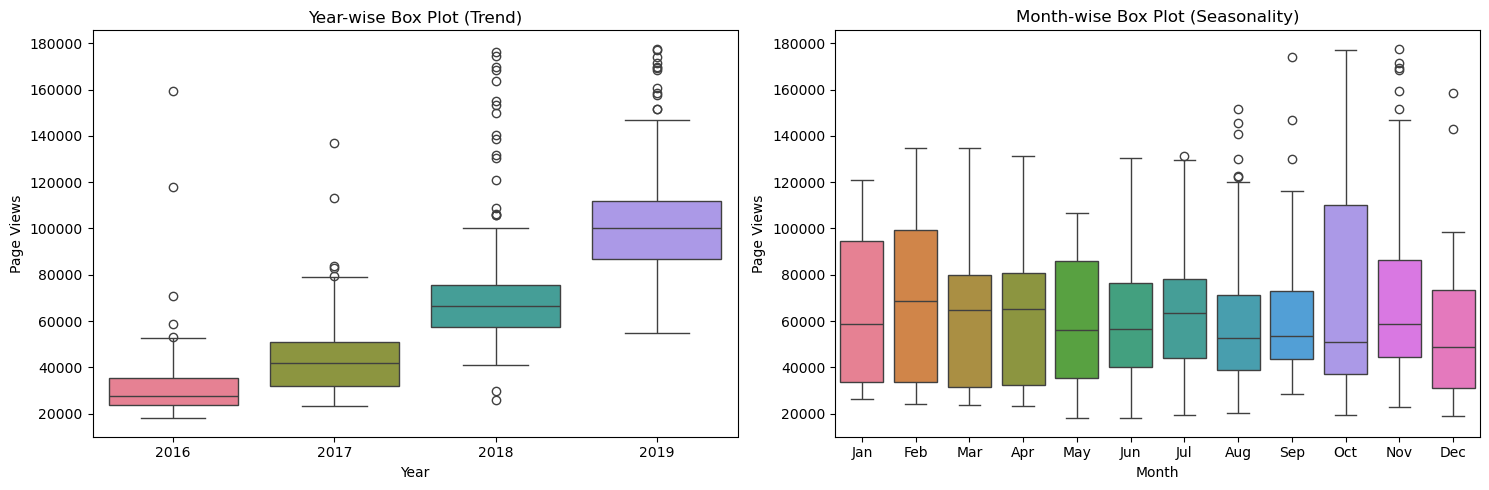

In [54]:
draw_box_plot()